<a href="https://colab.research.google.com/github/FranciscaAlliende/APS-Failure-at-Scania-Trucks/blob/master/Weighted_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# setup
from google.colab import drive
drive.mount("/content/drive")
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import basic_prepro as bp
import null_values as nv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import data
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aps_failure_training_set.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aps_failure_test_set.csv')

In [3]:
# basic prepocessing
train = bp.data_prepro(train)
test = bp.data_prepro(test)

In [4]:
[y_train, X_train, y_test, X_test] = nv.null_values(train, test, t=0.5)

## Standard RF


In [5]:
from sklearn.ensemble import RandomForestClassifier
 
clf = RandomForestClassifier(random_state=333) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

False positives:  17
False negatives:  110
Total cost: 55170
Confusion matrix, without normalization


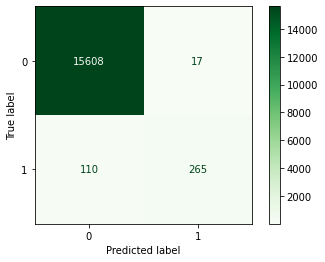

     Normalized confusion matrix


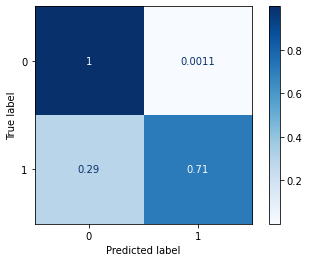

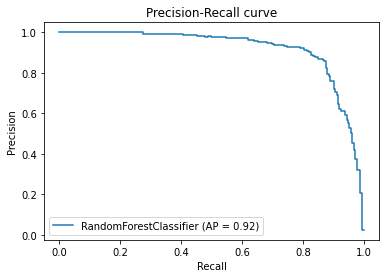

f1 score 0.807
precision:  0.94
recall 0.707


(55170, 0.8066971080669711, 0.9397163120567376, 0.7066666666666667)

In [6]:
import evaluation_metrics as em
em.evaluation_metrics(y_pred, y_test, X_test, clf, c1=10, c2=500)

## Weithed Random Forest

Remember that the goal is to minimize as much as possible the false negative and have the false positives under control

False positives:  11
False negatives:  154
Total cost: 77110
Confusion matrix, without normalization


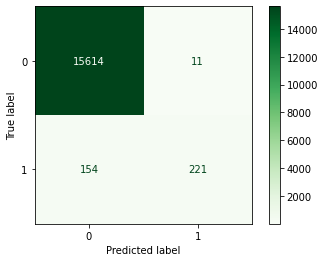

     Normalized confusion matrix


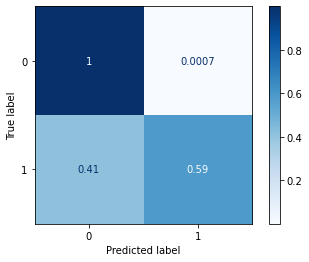

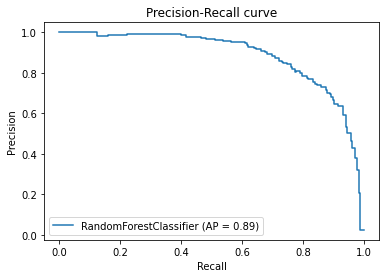

f1 score 0.728
precision:  0.953
recall 0.589


(77110, 0.728171334431631, 0.9525862068965517, 0.5893333333333334)

In [8]:
clf = RandomForestClassifier(random_state=333, class_weight="balanced") 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

em.evaluation_metrics(y_pred, y_test, X_test, clf, c1=10, c2=500)

False positives:  14
False negatives:  158
Total cost: 79140
Confusion matrix, without normalization


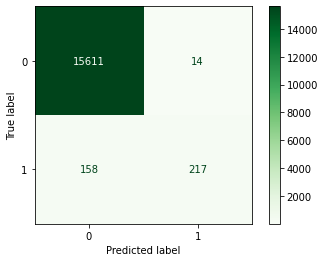

     Normalized confusion matrix


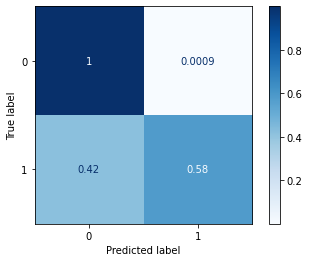

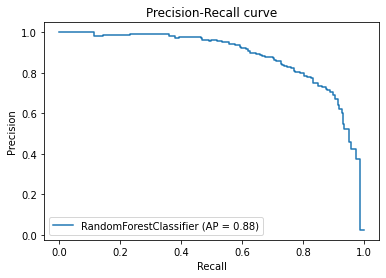

f1 score 0.716
precision:  0.939
recall 0.579


(79140, 0.7161716171617162, 0.9393939393939394, 0.5786666666666667)

In [9]:
clf = RandomForestClassifier(random_state=333, class_weight="balanced_subsample") 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

em.evaluation_metrics(y_pred, y_test, X_test, clf, c1=10, c2=500)

In [13]:
# custom wegthing
from sklearn.metrics import confusion_matrix

fps = []
fns = []
ws = []

w = 1

while w < 1000:
  clf = RandomForestClassifier(random_state=333,  class_weight={0:1, 1:w}) 
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  fps.append(fp)
  fns.append(fn)
  ws.append(w)
  w += 25

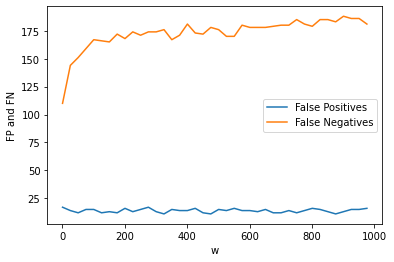

In [22]:
plt.plot(ws, fps, label = "False Positives")
plt.plot(ws, fns, label = "False Negatives")
plt.xlabel('w')
plt.ylabel('FP and FN')
plt.legend()
plt.show()